In [1]:
import numpy as np
#import mnist
import keras
from keras.datasets import mnist, boston_housing, fashion_mnist
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical


import matplotlib.pyplot as plt


In [2]:
keras.backend.backend()

'tensorflow'

In [3]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=mnist.load_data()

In [4]:
print(train_imagesi.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)
print(test_imagesi.shape) # (60000, 28, 28)
print(test_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


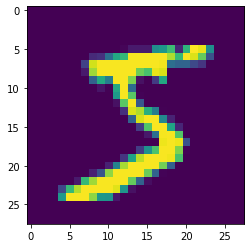

5


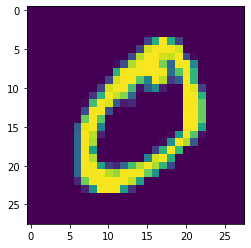

0


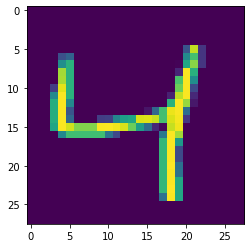

4


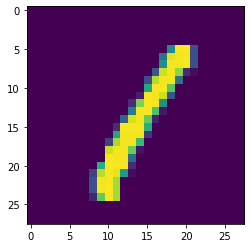

1


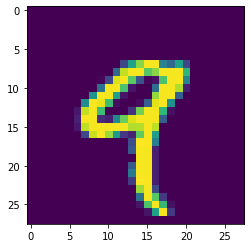

9


In [5]:
for i in range(5):
    plt.imshow(train_imagesi[i,:,:])
    plt.show()
    print(train_labels[i])

In [6]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1


# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 784)
(60000,)


In [8]:
train_images[202,150:160]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.90551181, -0.80314961, -0.80314961, -0.80314961, -0.80314961])

In [9]:
model1 = Sequential(name='my_model')
model1.add(Dense( 128, activation='relu', input_shape=(784,)))  
# входной слой + поносвязный слой из 128 нейронов с активацией ReLU
for k in range(2):
  model1.add(Dense(10+(10-k)*10, activation='tanh')) 
  # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh

model1.add(Dense(10, activation='softmax')) 
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

In [10]:
model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 110)               14190     
                                                                 
 dense_2 (Dense)             (None, 100)               11100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


In [11]:
model1.compile(
  optimizer='adam', # оптимизатор
  loss=keras.losses.CategoricalCrossentropy(), # функция потерь
  metrics=['accuracy'], # метрика
) 

In [12]:
model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 110)               14190     
                                                                 
 dense_2 (Dense)             (None, 100)               11100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


In [13]:
model1.get_config()

{'name': 'my_model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 110,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_init

In [14]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [16]:
y_train[:5,:],y_test[:5,:]

(array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))

In [17]:
y_pred = model1.predict(test_images[:5,:])


In [18]:
y_pred[0,:]

array([0.10831272, 0.08706849, 0.08487017, 0.05832193, 0.02641711,
       0.08474386, 0.11092069, 0.29163325, 0.07249442, 0.0752173 ],
      dtype=float32)

In [19]:
y_class = np.argmax(y_pred, axis=1)
print(y_class) # [7, 2, 1, 0, 4]

[7 5 2 1 7]


In [20]:
test_labels[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

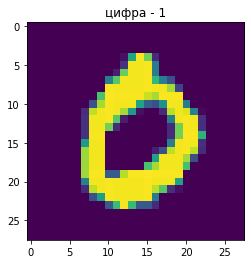

In [21]:
n = 3
plt.imshow(test_imagesi[n,:,:])
plt.title('цифра - '+str(y_class[n]))
plt.show()

In [66]:
# Train the model.
model1.fit(  
  train_images[:,:],
  y_train[:,:],
  epochs=15,
  batch_size=1024, validation_split=0.2
)

Epoch 1/15
47/47 [==============================] - 1s 20ms/step - loss: 0.9008 - accuracy: 0.7408 - val_loss: 0.3612 - val_accuracy: 0.8998
Epoch 2/15
47/47 [==============================] - 1s 17ms/step - loss: 0.3151 - accuracy: 0.9095 - val_loss: 0.2507 - val_accuracy: 0.9276
Epoch 3/15
47/47 [==============================] - 1s 16ms/step - loss: 0.2340 - accuracy: 0.9321 - val_loss: 0.2013 - val_accuracy: 0.9422
Epoch 4/15
47/47 [==============================] - 1s 16ms/step - loss: 0.1885 - accuracy: 0.9449 - val_loss: 0.1677 - val_accuracy: 0.9506
Epoch 5/15
47/47 [==============================] - 1s 16ms/step - loss: 0.1540 - accuracy: 0.9544 - val_loss: 0.1499 - val_accuracy: 0.9575
Epoch 6/15
47/47 [==============================] - 1s 16ms/step - loss: 0.1300 - accuracy: 0.9619 - val_loss: 0.1418 - val_accuracy: 0.9578
Epoch 7/15
47/47 [==============================] - 1s 16ms/step - loss: 0.1175 - accuracy: 0.9640 - val_loss: 0.1198 - val_accuracy: 0.9640
Epoch 8/15
47

In [73]:
# Evaluate the model.
model1.evaluate( 
  test_images,
  y_test
)

# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])

# Print our model's predictions.
print(f'Предсказанные - {np.argmax(predictions, axis=1)}') # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(f'Целевые - {test_labels[:5]}') # [7, 2, 1, 0, 4]

313/313 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9766
Предсказанные - [7 2 1 0 4]
Целевые - [7 2 1 0 4]


In [70]:
hh = model1.fit(  
  train_images[:,:],
  y_train[:,:],
  epochs=15,
  batch_size=1024, validation_split=0.2
)

Epoch 1/15
47/47 [==============================] - 1s 18ms/step - loss: 0.0417 - accuracy: 0.9880 - val_loss: 0.0913 - val_accuracy: 0.9727
Epoch 2/15
47/47 [==============================] - 1s 17ms/step - loss: 0.0402 - accuracy: 0.9885 - val_loss: 0.0921 - val_accuracy: 0.9730
Epoch 3/15
47/47 [==============================] - 1s 16ms/step - loss: 0.0353 - accuracy: 0.9903 - val_loss: 0.0867 - val_accuracy: 0.9745
Epoch 4/15
47/47 [==============================] - 1s 15ms/step - loss: 0.0296 - accuracy: 0.9920 - val_loss: 0.0862 - val_accuracy: 0.9738
Epoch 5/15
47/47 [==============================] - 1s 16ms/step - loss: 0.0280 - accuracy: 0.9930 - val_loss: 0.0865 - val_accuracy: 0.9748
Epoch 6/15
47/47 [==============================] - 1s 16ms/step - loss: 0.0259 - accuracy: 0.9933 - val_loss: 0.0851 - val_accuracy: 0.9761
Epoch 7/15
47/47 [==============================] - 1s 17ms/step - loss: 0.0230 - accuracy: 0.9945 - val_loss: 0.0926 - val_accuracy: 0.9745
Epoch 8/15
47

In [71]:
hh.history

{'loss': [0.0416734553873539,
  0.04018092527985573,
  0.03530747815966606,
  0.029569249600172043,
  0.02795691229403019,
  0.02593947947025299,
  0.022992484271526337,
  0.024445943534374237,
  0.02270941250026226,
  0.01653122343122959,
  0.015592136420309544,
  0.013555373065173626,
  0.01069906447082758,
  0.010431090369820595,
  0.010021032765507698],
 'accuracy': [0.9879999756813049,
  0.9884999990463257,
  0.9903333187103271,
  0.9919999837875366,
  0.9929583072662354,
  0.9932916760444641,
  0.9944583177566528,
  0.9938750267028809,
  0.9937083125114441,
  0.9961666464805603,
  0.9965000152587891,
  0.9974166750907898,
  0.9986041784286499,
  0.9983333349227905,
  0.9981041550636292],
 'val_loss': [0.0913337916135788,
  0.0921131893992424,
  0.08666335791349411,
  0.08618377894163132,
  0.0864550769329071,
  0.08510205894708633,
  0.09259641170501709,
  0.09620165079832077,
  0.08827860653400421,
  0.08741723746061325,
  0.08931554108858109,
  0.08537131547927856,
  0.09016011

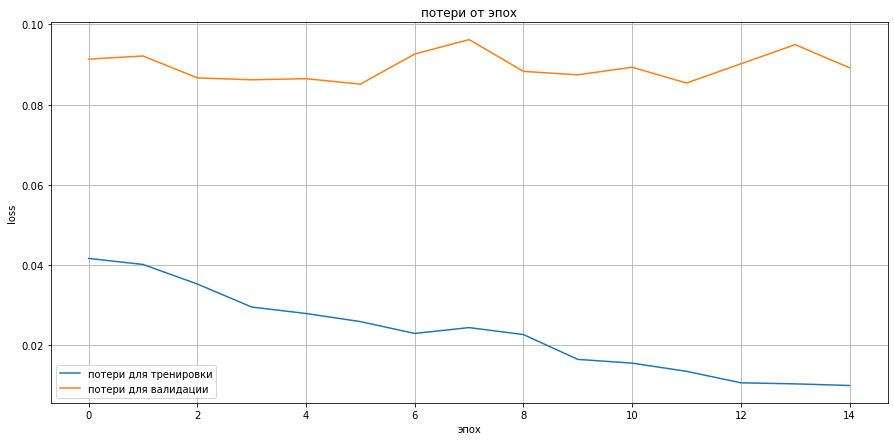

In [74]:
plt.figure(figsize=(15,7))
plt.plot(hh.history['loss'], label = 'потери для тренировки')
plt.plot(hh.history['val_loss'], label = 'потери для валидации')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show()

Эксперимент с разными оптимизаторами для одной начальной модели:

  - создаем модель model
  - сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
  - создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры) 
  - загружаем веса modeli.load_weights('model.h5')
  - компилируем modeli с одним из оптимизаторов
  - вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
  - проводим обучение модели и пишем ошибки в истории hh
  - выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных



Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…


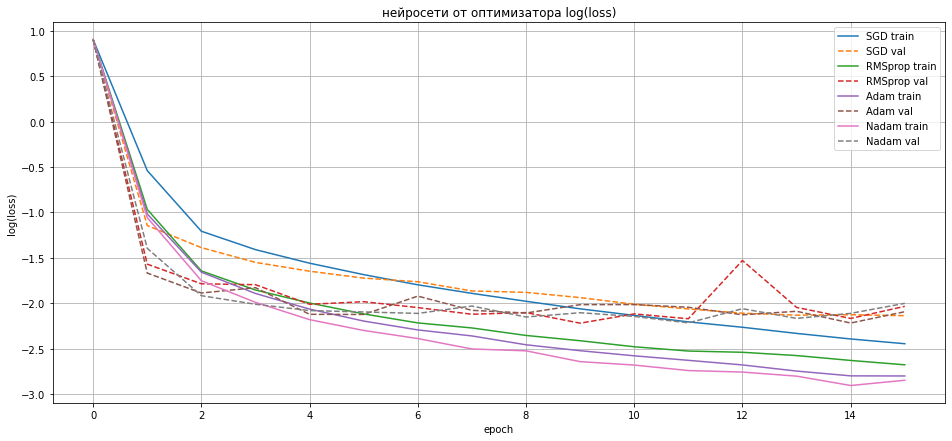

In [75]:
# создаем модель model
model = Sequential([
                      Dense( 64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [76]:
 modeli.optimizer.get_config()

{'name': 'Nadam',
 'learning_rate': 0.001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

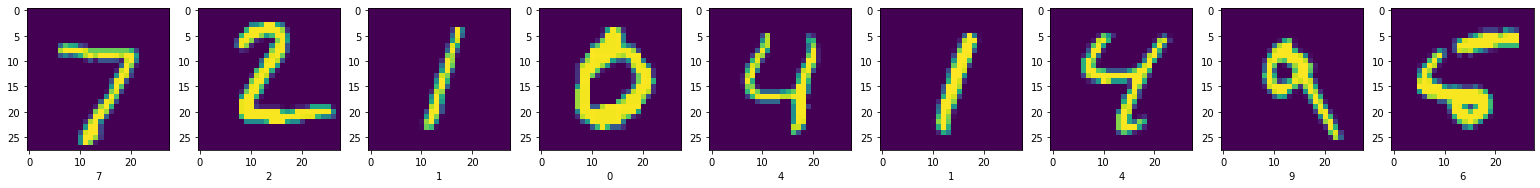

In [77]:
N = 9
y_pred = model1.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

In [78]:
y_pred_class

array([7, 2, 1, 0, 4, 1, 4, 9, 6], dtype=int64)

In [79]:
y_test[:9]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [81]:
y_predi = model1(test_images[:,:])
print(y_predi)
np.argmax(y_predi[:9],axis=1)

tf.Tensor(
[[7.3264218e-08 1.1235586e-07 6.1092857e-07 ... 9.9994838e-01
  2.6282353e-07 3.0289513e-05]
 [3.4587895e-06 9.3795306e-06 9.9995589e-01 ... 1.7666846e-08
  1.2926038e-05 2.5537479e-09]
 [1.8073280e-07 9.9997032e-01 5.8944561e-06 ... 6.8750905e-06
  1.7871980e-06 1.1606567e-07]
 ...
 [3.4654146e-08 7.7268901e-08 8.9722263e-08 ... 4.0472574e-07
  4.7646614e-07 2.3228406e-06]
 [2.2759911e-08 9.1534886e-09 5.2978950e-09 ... 4.2570857e-08
  1.7474846e-06 3.1035725e-09]
 [5.0207581e-07 1.6436138e-08 1.3935201e-07 ... 1.2587844e-07
  6.9212319e-08 5.5244560e-09]], shape=(10000, 10), dtype=float32)


array([7, 2, 1, 0, 4, 1, 4, 9, 6], dtype=int64)

In [84]:
yy = np.argmax(y_predi,axis=1)
print(yy[:9])
np.where(test_labels != yy)[0] #где мы ошиблись

[7 2 1 0 4 1 4 9 6]


array([5, 3, 4, 4, 9, 2, 5, 6, 8, 8, 2, 2, 7, 5, 9, 0, 1, 3, 8, 5, 1, 6,
       6, 5, 7, 6, 4, 3, 9, 7, 7, 4, 9, 5, 5, 8, 7, 5, 2, 5, 7, 7, 7, 8,
       4, 9, 3, 2, 6, 2, 3, 9, 4, 7, 2, 3, 9, 5, 7, 2, 0, 7, 7, 5, 2, 4,
       7, 2, 3, 6, 9, 4, 6, 3, 0, 5, 8, 5, 9, 8, 9, 9, 9, 2, 2, 4, 5, 3,
       9, 7, 9, 6, 8, 5, 4, 8, 7, 9, 3, 3, 9, 8, 1, 5, 2, 0, 8, 7, 6, 7,
       7, 1, 3, 4, 9, 6, 4, 5, 9, 1, 8, 8, 7, 5, 4, 2, 0, 7, 5, 9, 4, 5,
       7, 9, 3, 0, 8, 9, 8, 8, 2, 7, 1, 9, 2, 5, 2, 9, 5, 4, 9, 8, 6, 6,
       7, 8, 8, 3, 8, 6, 9, 4, 8, 0, 2, 3, 1, 1, 8, 7, 1, 7, 3, 4, 7, 4,
       5, 3, 5, 3, 5, 3, 0, 5, 3, 8, 3, 9, 9, 9, 9, 9, 2, 7, 0, 8, 0, 8,
       1, 6, 8, 8, 8, 5, 2, 2, 0, 8, 8, 4, 8, 4, 7, 7, 3, 7, 8, 9, 9, 0,
       4, 6, 9, 5, 2, 5, 5, 2, 9, 2, 2, 3, 3, 5], dtype=uint8)